In [1]:
import sqlite3 as sql
import pandas as pd

In [2]:
con=sql.connect(r"C:\Users\JOSHI\Desktop\Py Pro\Bank_Final2.db")
con.execute("CREATE TABLE IF NOT EXISTS Customers(Customer_name VARCHAR(100),Address VARCHAR(100),Account_number INTEGER PRIMARY KEY,Balance INTEGER,Loan_type VARCHAR(100))")
con.commit()

In [3]:
cur=con.cursor()
cur.execute("INSERT INTO Customers VALUES('Yash','Pune',100,100000,'Personal Loan')")
cur.execute("INSERT INTO Customers VALUES('Pokey','Mumbai',101,150000,'Personal Loan')")
cur.execute("INSERT INTO Customers VALUES('Vishwa','Nagpur',102,250000,'Personal Loan')")
cur.execute("INSERT INTO Customers VALUES('Reddy','Chennai',103,350000,'Personal Loan')")
cur.execute("INSERT INTO Customers VALUES('Simran','Pune',104,450000,'Personal Loan')")
cur.execute("INSERT INTO Customers VALUES('Banu','Nagpur',105,550000,'Personal Loan')")
cur.execute("INSERT INTO Customers VALUES('Rama','Mumbai',106,50000,'Education Loan')")
cur.execute("INSERT INTO Customers VALUES('Shashank','Pune',107,70000,'Education Loan')")
cur.execute("INSERT INTO Customers VALUES('Nupur','Mumbai',108,80000,'Education Loan')")
cur.execute("INSERT INTO Customers VALUES('Kale','Mumbai',109,111100,'Vehicle Loan')")
cur.execute("INSERT INTO Customers VALUES('Soman','Pune',110,222200,'Vehicle Loan')")
cur.execute("INSERT INTO Customers VALUES('Atharva','Chennai',111,333300,'Vehicle Loan')")
cur.execute("INSERT INTO Customers VALUES('Roops','Nagpur',112,444400,'Vehicle Loan')")
cur.execute("INSERT INTO Customers VALUES('Kontya','Mumbai',113,75900,'Property Mortage Loan')")
cur.execute("INSERT INTO Customers VALUES('Mahi','Pune',114,111890,'Property Mortage Loan')")
cur.execute("INSERT INTO Customers VALUES('Sachin','Mumbai',115,750000,'CreditCard Loan')")
cur.execute("INSERT INTO Customers VALUES('Aarti','Nagpur',116,850000,'CreditCard Loan')")
cur.execute("INSERT INTO Customers VALUES('Gunna','Nagpur',117,250000,'No Loan')")
cur.execute("INSERT INTO Customers VALUES('Uma','Chennai',118,150000,'No Loan')")
cur.execute("INSERT INTO Customers VALUES('Prachi','Pune',119,950000,'No Loan')")
con.commit()

In [4]:
cur=con.cursor()
cur.execute("Select * from Customers")
l=cur.fetchall()
for i in l:
    print(i)

('Yash', 'Pune', 100, 100000, 'Personal Loan')
('Pokey', 'Mumbai', 101, 150000, 'Personal Loan')
('Vishwa', 'Nagpur', 102, 250000, 'Personal Loan')
('Reddy', 'Chennai', 103, 350000, 'Personal Loan')
('Simran', 'Pune', 104, 450000, 'Personal Loan')
('Banu', 'Nagpur', 105, 550000, 'Personal Loan')
('Rama', 'Mumbai', 106, 50000, 'Education Loan')
('Shashank', 'Pune', 107, 70000, 'Education Loan')
('Nupur', 'Mumbai', 108, 80000, 'Education Loan')
('Kale', 'Mumbai', 109, 111100, 'Vehicle Loan')
('Soman', 'Pune', 110, 222200, 'Vehicle Loan')
('Atharva', 'Chennai', 111, 333300, 'Vehicle Loan')
('Roops', 'Nagpur', 112, 444400, 'Vehicle Loan')
('Kontya', 'Mumbai', 113, 75900, 'Property Mortage Loan')
('Mahi', 'Pune', 114, 111890, 'Property Mortage Loan')
('Sachin', 'Mumbai', 115, 750000, 'CreditCard Loan')
('Aarti', 'Nagpur', 116, 850000, 'CreditCard Loan')
('Gunna', 'Nagpur', 117, 250000, 'No Loan')
('Uma', 'Chennai', 118, 150000, 'No Loan')
('Prachi', 'Pune', 119, 950000, 'No Loan')


In [5]:
df = pd.read_sql_query("SELECT * from Customers", con)
print(df.head())

  Customer_name  Address  Account_number  Balance      Loan_type
0          Yash     Pune             100   100000  Personal Loan
1         Pokey   Mumbai             101   150000  Personal Loan
2        Vishwa   Nagpur             102   250000  Personal Loan
3         Reddy  Chennai             103   350000  Personal Loan
4        Simran     Pune             104   450000  Personal Loan


In [6]:
df.to_csv("Customers_Final.csv",index="False")

In [10]:
df1 = pd.read_sql_query('SELECT Loan_type,count(Account_number) from Customers  group by Loan_type',con)

In [11]:
df1

,Loan_type,count(Account_number)
0,CreditCard Loan,2
1,Education Loan,3
2,No Loan,3
3,Personal Loan,6
4,Property Mortage Loan,2
5,Vehicle Loan,4


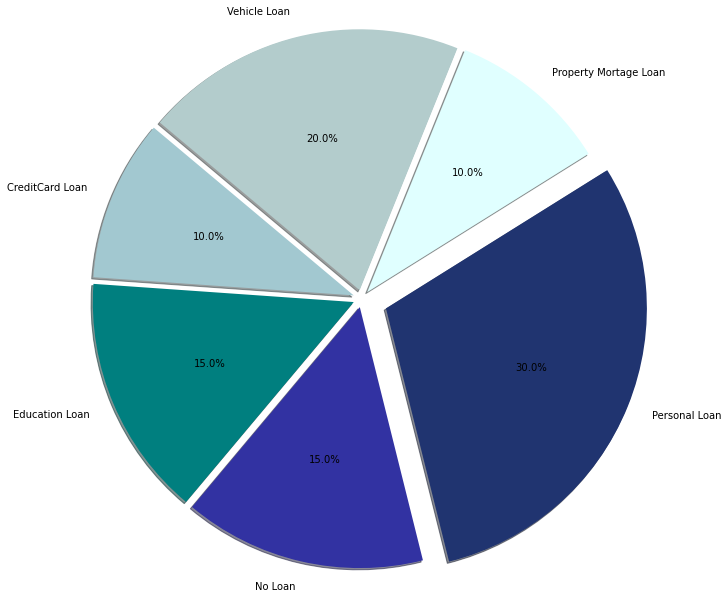

In [23]:
import matplotlib.pyplot as plt
loan_data = df1["Loan_type"]
c_data = df1["count(Account_number)"]
colors = ["#a2c8d0", "#007F7F",  "#3232A2","#203470", "#E0FFFF","#B3CCCC"]
explode = (0.1, 0.1, 0.1, 0.3, 0.1, 0.1) 
plt.pie(c_data, labels=loan_data, explode=explode ,colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140,radius=3)
plt.savefig("Pie-chart.png", bbox_inches='tight')
